In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DARKGRID = "darkgrid"
sns.set_style(DARKGRID)

# Exercício Seaborn

1. **Gráfico de Linha:**
   Crie um gráfico de linha mostrando o crescimento populacional ao longo dos anos (populacao_brasileira.csv) ou variação de idades ao longo dos registros (german_credit_data.csv).


In [3]:
populacao = pd.read_csv('./../../Datasets/populacao_brasileira.csv', sep=';')
display(populacao.shape, populacao.head())


(37, 2)

,year,population
0,1980,119011052
1,1981,121154159
2,1982,123774229
3,1983,126403352
4,1984,129025577


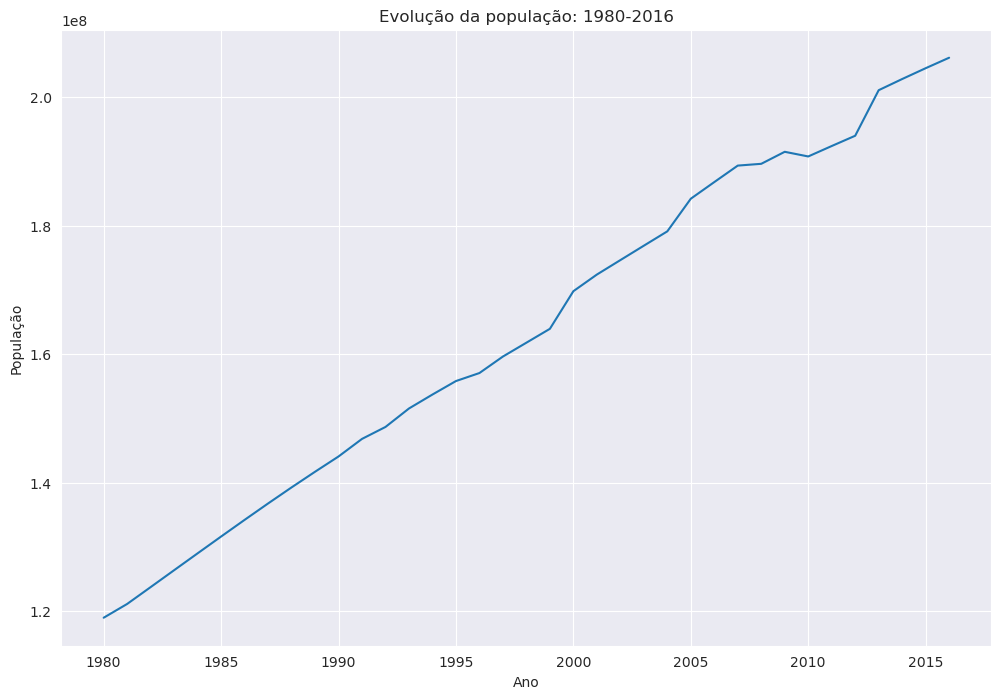

In [4]:
plt.figure(figsize=(12,8))
fig = sns.lineplot(populacao, x='year', y='population')

fig.set(xlabel='Ano', ylabel='População', \
    title=f"Evolução da população: {populacao['year'].min()}-{populacao['year'].max()}")
plt.show()

2. **Gráfico de Barras:**
   Represente a distribuição de frequência de variáveis qualitativas (categorias) (por exemplo, pessoas por sexo). 


In [5]:
credit = pd.read_csv('./../../Datasets/german_credit_data.csv')
credit.drop(credit.columns[0], axis=1, inplace=True)
display(credit.shape, credit.head())

(1000, 9)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


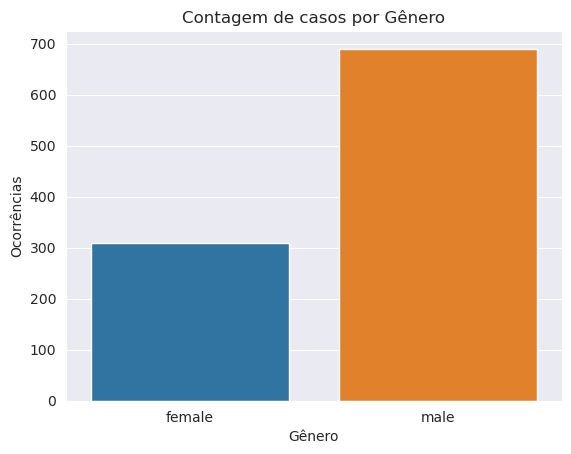

,gender,count
0,female,310
1,male,690


In [6]:
cred_by_gender = credit.groupby('Sex').size().reset_index()
cred_by_gender.columns = ['gender', 'count']
fig = sns.barplot(cred_by_gender, x='gender', y='count')
fig.set(xlabel='Gênero', ylabel='Ocorrências', title='Contagem de casos por Gênero')
plt.show()
display(cred_by_gender)

# sns.barplot(credit, x='Sex', hue='Sex')

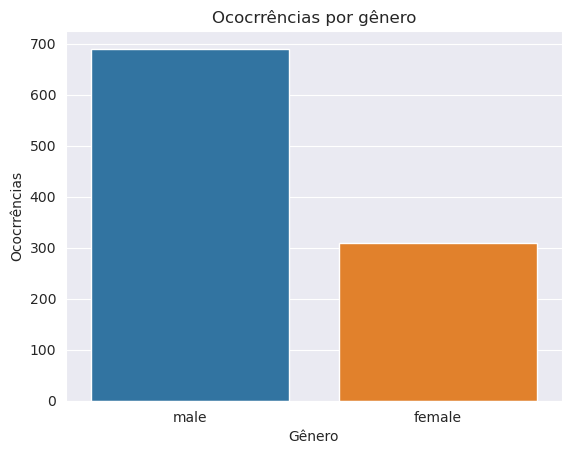

In [7]:
sns.countplot(x=credit['Sex'], data=credit)
plt.title("Ococrrências por gênero")
plt.xlabel('Gênero')
plt.ylabel('Ococrrências')
plt.show()

# usar estimator e ci Intervalo de confianca


1. **Gráfico de Pizza:**
   Mostre a distribuição percentual de variáveis categóricas (por exemplo, distribuição dos propósitos).


In [8]:
# Preenchendo dados faltantes com a moda
credit['Saving accounts'].fillna(credit['Saving accounts'].mode().values[0], inplace=True)

# Criando dataframe com a contagem das categorias
saving_sizes = credit.groupby('Saving accounts').size().reset_index()

# Renomeando as categorias
saving_sizes.columns = ['CATEGORY SIZE', 'COUNT']

# Alterando os nomes das categorias para maiúsculo
saving_sizes['CATEGORY SIZE'] = saving_sizes['CATEGORY SIZE'].apply(lambda x : str(x).upper())

saving_sizes

,CATEGORY SIZE,COUNT
0,LITTLE,786
1,MODERATE,103
2,QUITE RICH,63
3,RICH,48


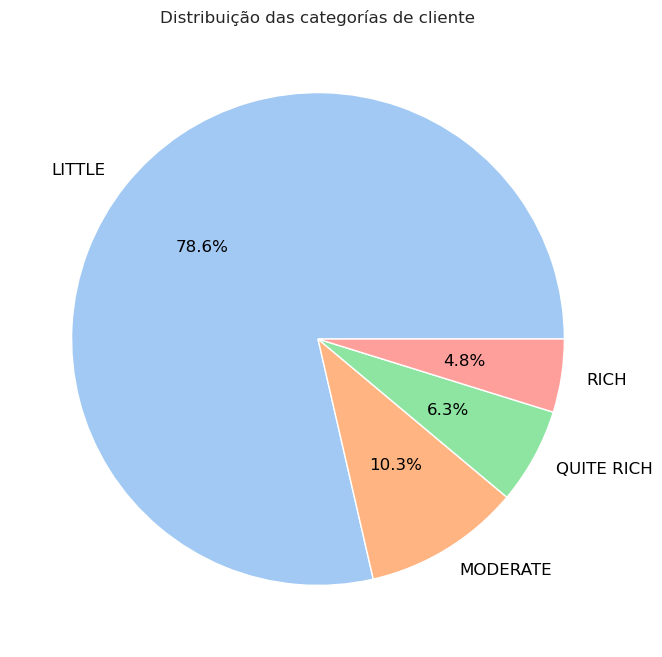

In [9]:
colors = sns.color_palette('pastel')[0:len(saving_sizes)]

plt.figure(figsize=(10,8))
plt.pie(saving_sizes['COUNT'], labels=saving_sizes['CATEGORY SIZE'], \
        textprops=dict(fontsize=12, color='black'), autopct='%.1f%%', colors=colors)
plt.title("Distribuição das categorías de cliente")

plt.show()


2. **Histograma:**
   Crie um histograma para analisar a distribuição de uma variável (por exemplo, idade) em um conjunto de dados.


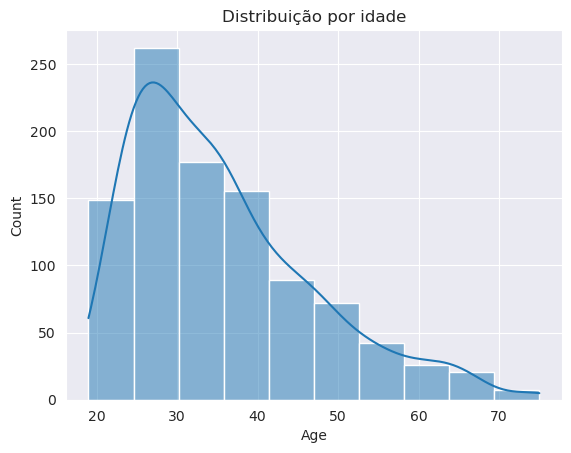

In [10]:
sns.histplot(data=credit, x='Age', bins=10,  kde=True)
plt.title('Distribuição por idade')
plt.show()

3. **Gráfico de Dispersão:**
   Visualize a relação entre 2 variáveis (por exemplo idade vs. valor do crédito) usando um gráfico de dispersão.


In [11]:
# heart
heart = pd.read_csv('./../../Datasets/heart.csv')
display(heart.shape, heart.head())

(303, 14)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


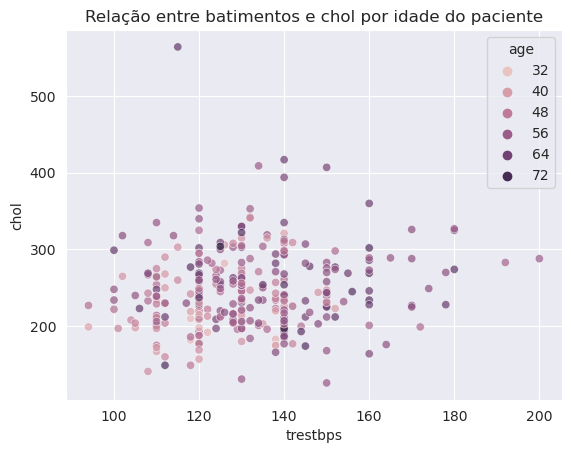

In [20]:
sns.scatterplot(data=heart, x='trestbps', y='chol', hue='age', alpha=0.7)
plt.title('Relação entre batimentos e chol por idade do paciente')
plt.show()


4. **Gráfico de Boxplot:**
   Crie um boxplot para analisar a distribuição de variáveis (por exemplo, distribuição de idade por sexo).


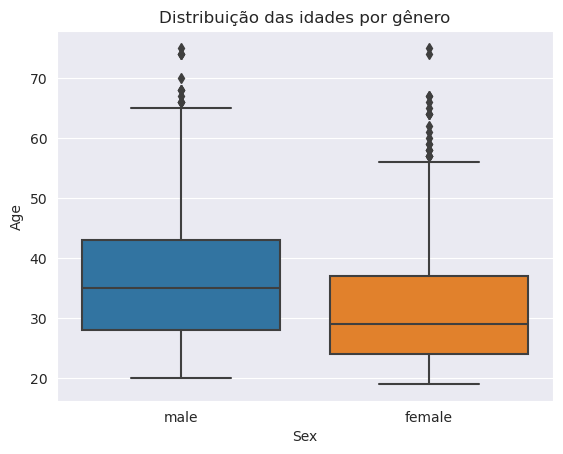

In [13]:
sns.boxplot(data=credit, y='Age', x='Sex')
plt.title("Distribuição das idades por gênero")
plt.show()


5. **Mapa de Calor (Heatmap):**
   Crie um mapa de calor para visualizar a correlação entre diferentes variáveis em um conjunto de dados.

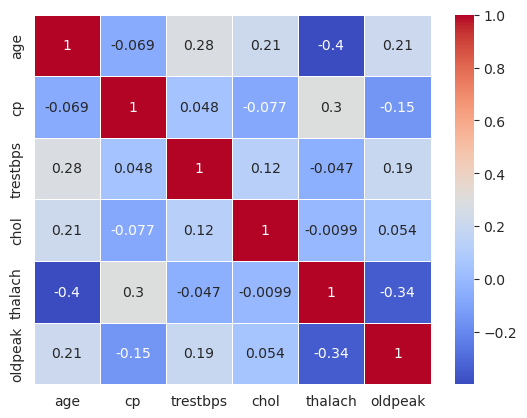

In [22]:

sns.heatmap(data=heart[['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak']].corr(), \
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()